# Adversarial Examples

En este Notebook se exploran los ejemplos adversariales generados por la pipeline.

## Importaciones

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms

## Cargar el conjunto de datos

In [2]:
testset = torchvision.datasets.CIFAR10(
    root='../data/01_raw', train=False, download=True)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified


## Comparar el modelo con los ejemplos adversariales:

In [3]:
attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
models = ['Resnet','Regnet_x','Regnet_y']
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[09/21/23 02:19:10] INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=536855;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=313861;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

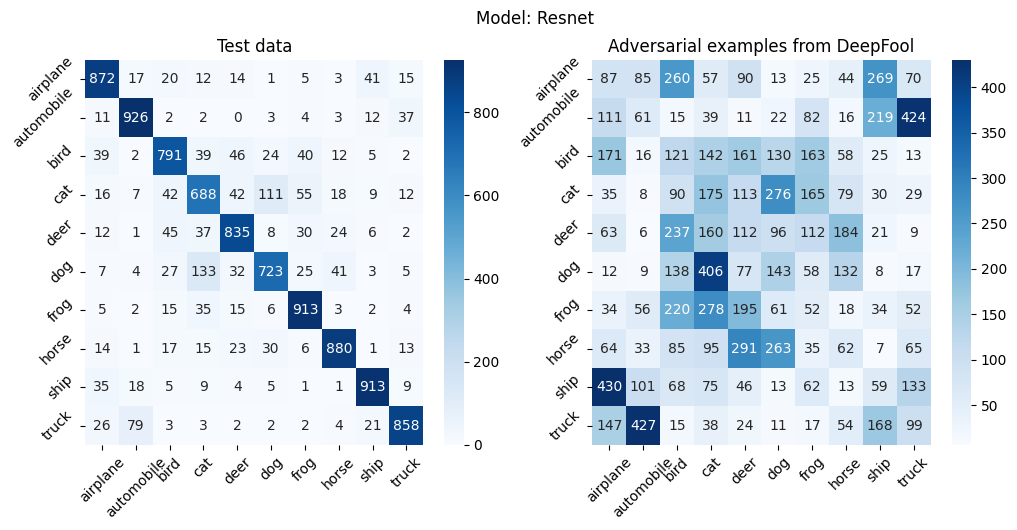

                    INFO     Loading data from 'Resnet_model_Adversarial_CarliniL2@Dataset'     ]8;id=710344;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=654023;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

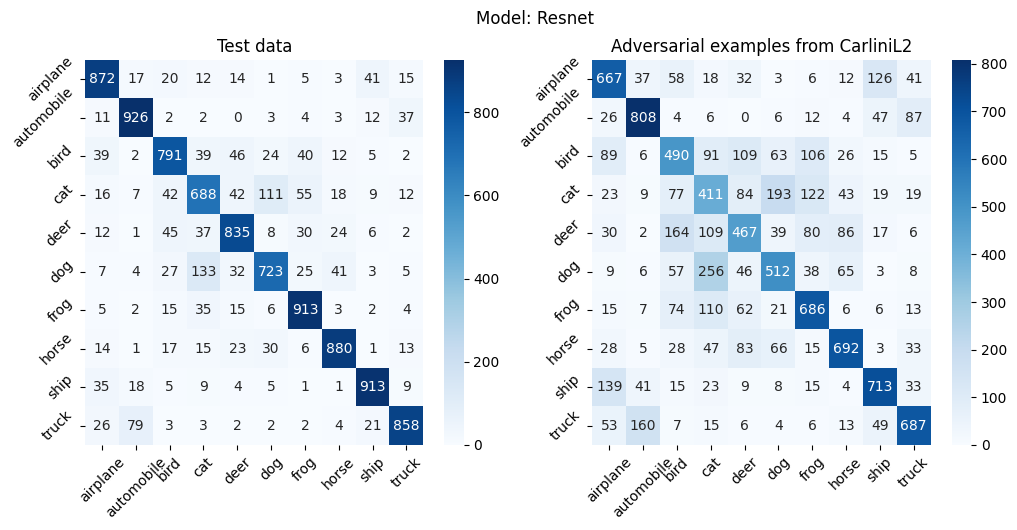

[09/21/23 02:19:11] INFO     Loading data from 'Resnet_model_Adversarial_FSGM@Dataset'          ]8;id=298138;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=549920;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

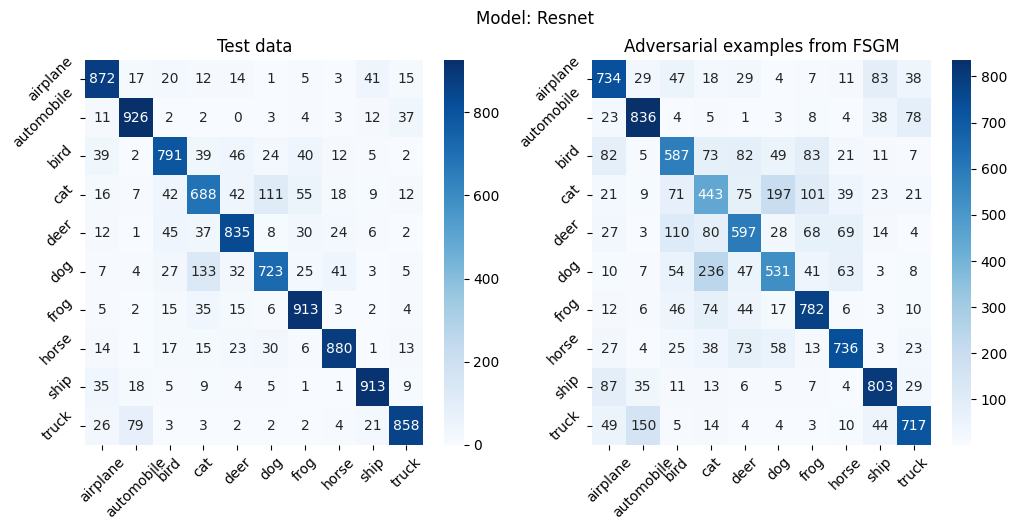

                    INFO     Loading data from 'Resnet_model_Adversarial_PGD@Dataset'           ]8;id=689879;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=521883;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

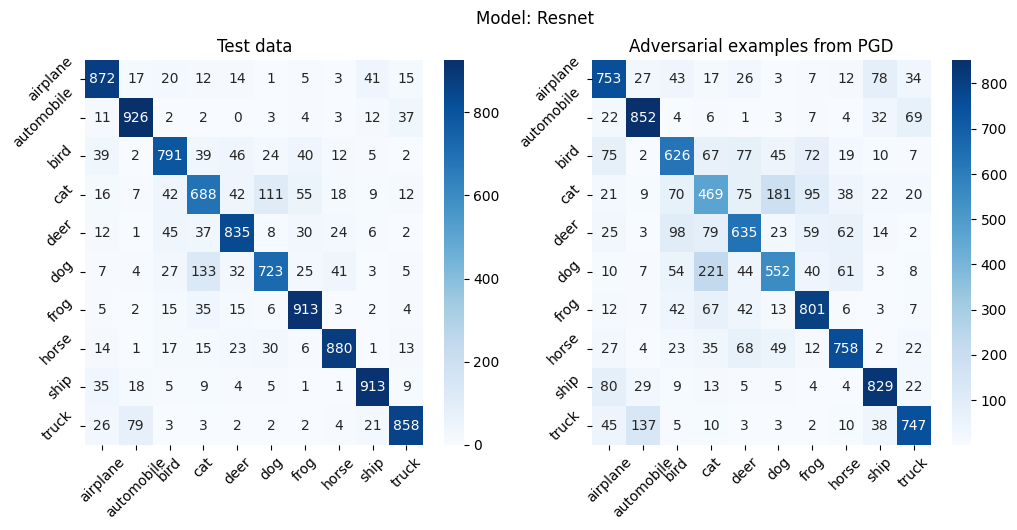

                    INFO     Loading data from 'Regnet_x_model_Adversarial_DeepFool@Dataset'    ]8;id=818047;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=243993;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

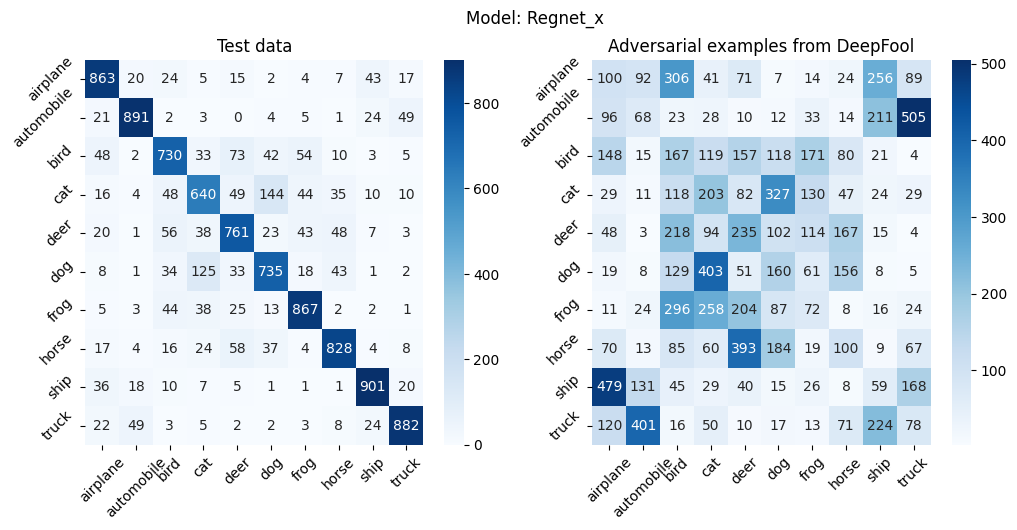

[09/21/23 02:19:12] INFO     Loading data from 'Regnet_x_model_Adversarial_CarliniL2@Dataset'   ]8;id=415332;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=366810;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

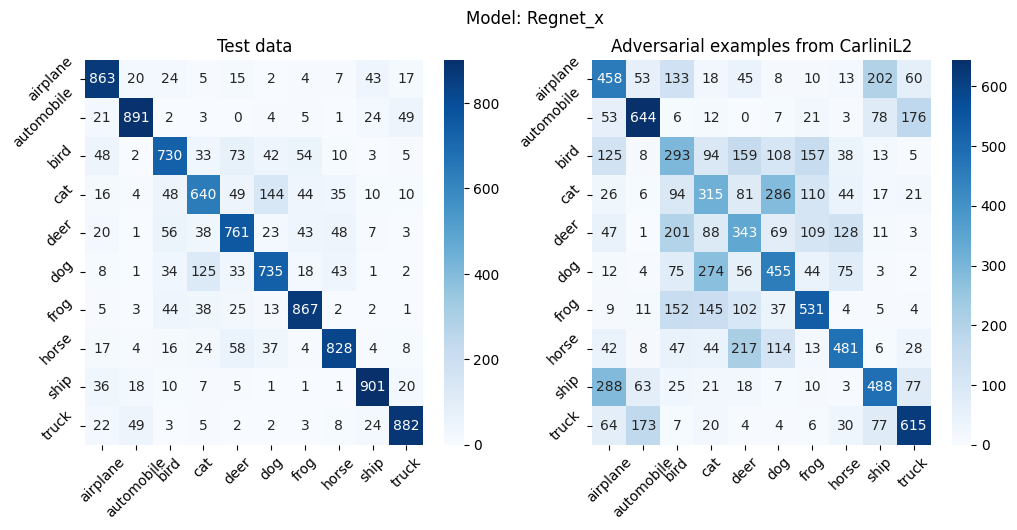

                    INFO     Loading data from 'Regnet_x_model_Adversarial_FSGM@Dataset'        ]8;id=306245;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=787781;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

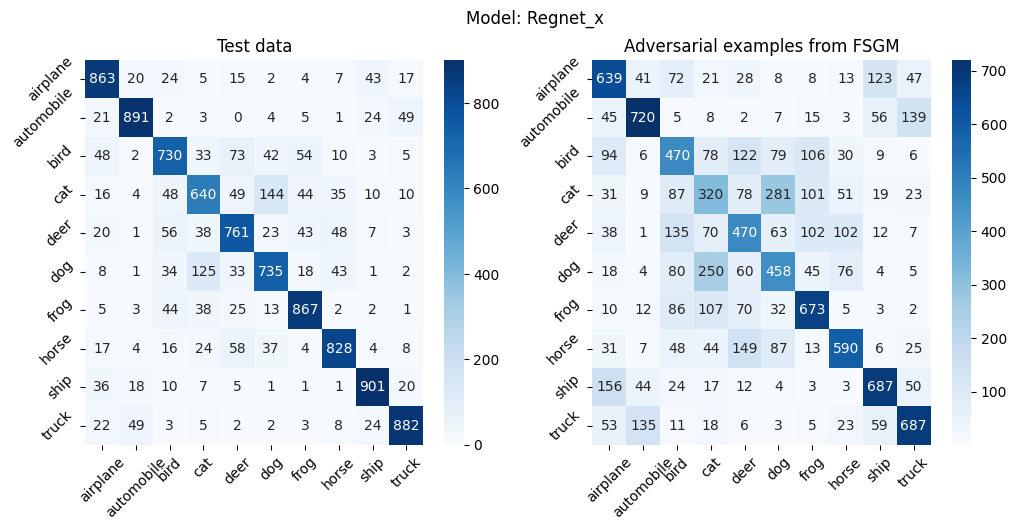

                    INFO     Loading data from 'Regnet_x_model_Adversarial_PGD@Dataset'         ]8;id=780400;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=464380;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

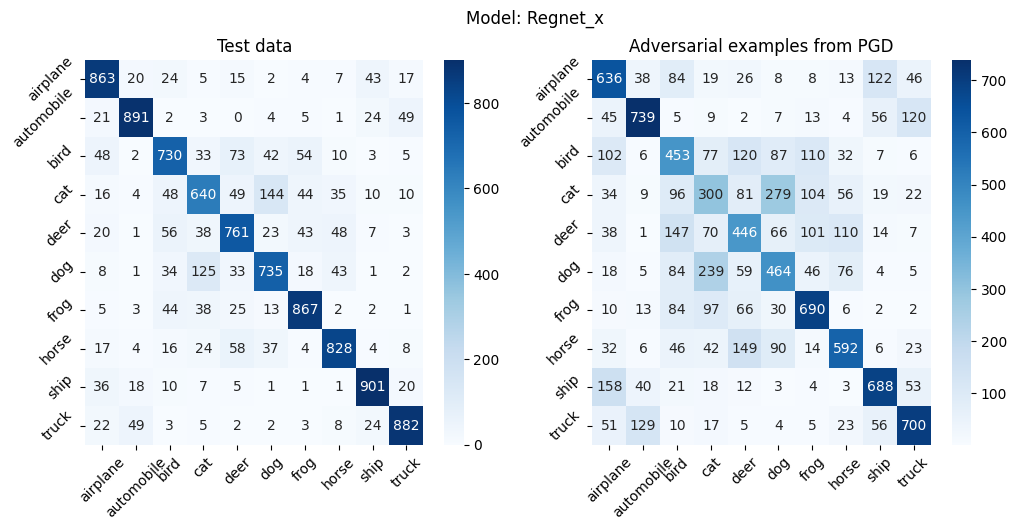

[09/21/23 02:19:13] INFO     Loading data from 'Regnet_y_model_Adversarial_DeepFool@Dataset'    ]8;id=688565;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=859382;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

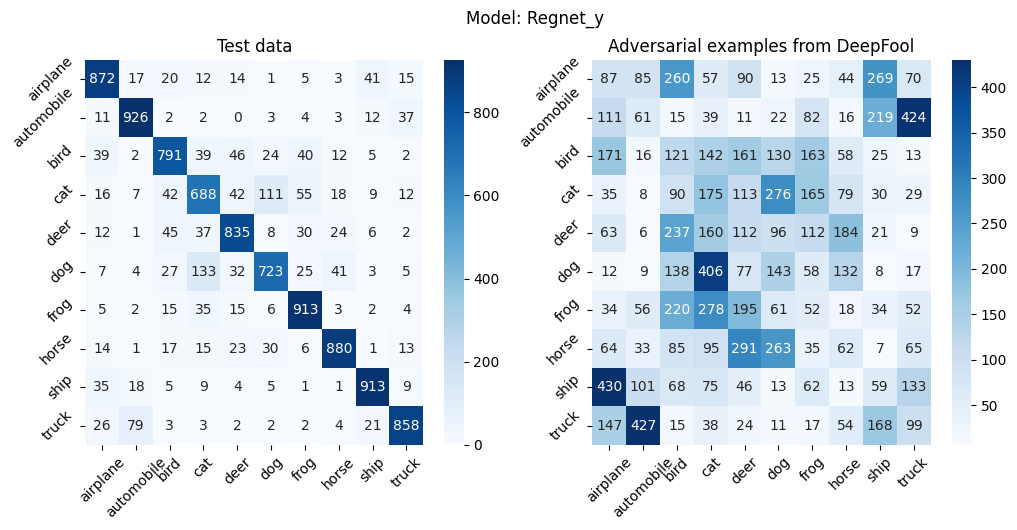

                    INFO     Loading data from 'Regnet_y_model_Adversarial_CarliniL2@Dataset'   ]8;id=787641;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=67976;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

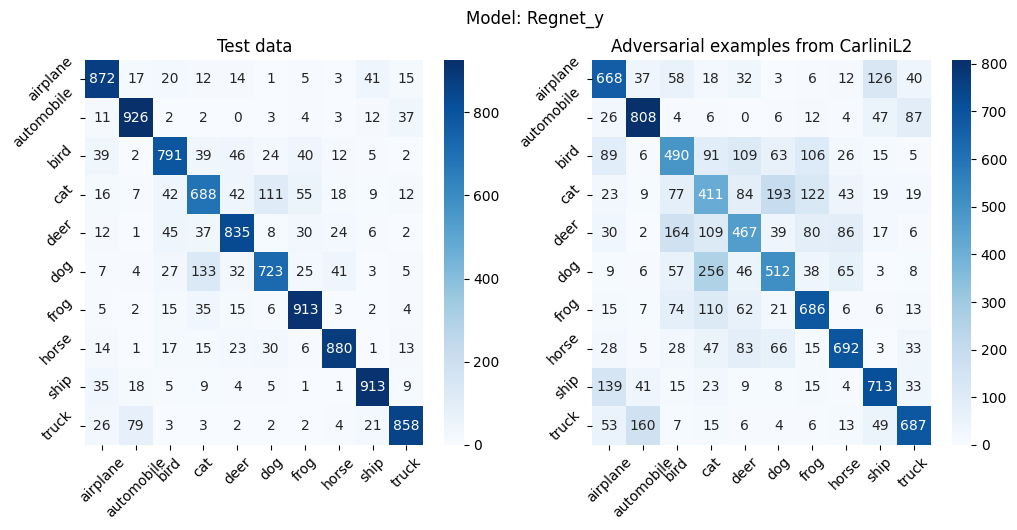

                    INFO     Loading data from 'Regnet_y_model_Adversarial_FSGM@Dataset'        ]8;id=820157;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=828067;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

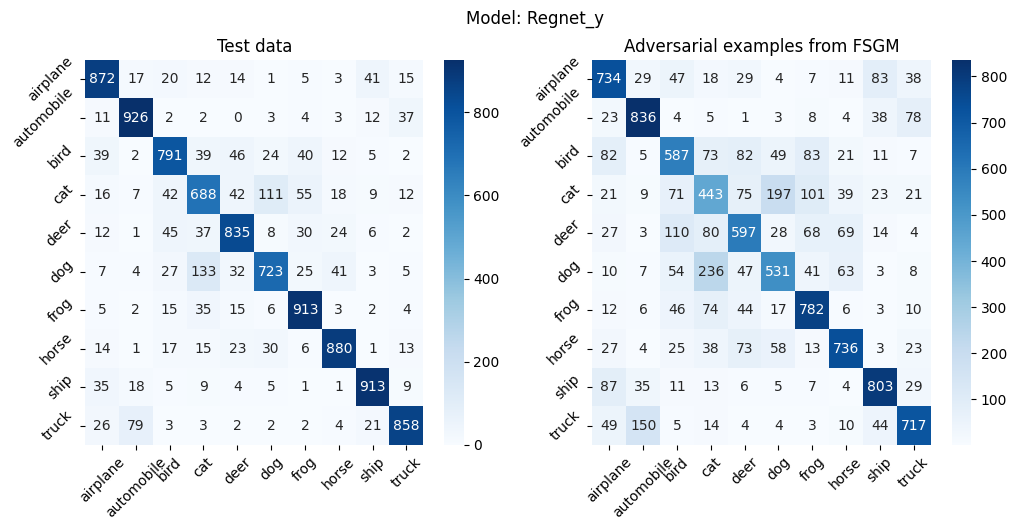

[09/21/23 02:19:14] INFO     Loading data from 'Regnet_y_model_Adversarial_PGD@Dataset'         ]8;id=549982;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=300782;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

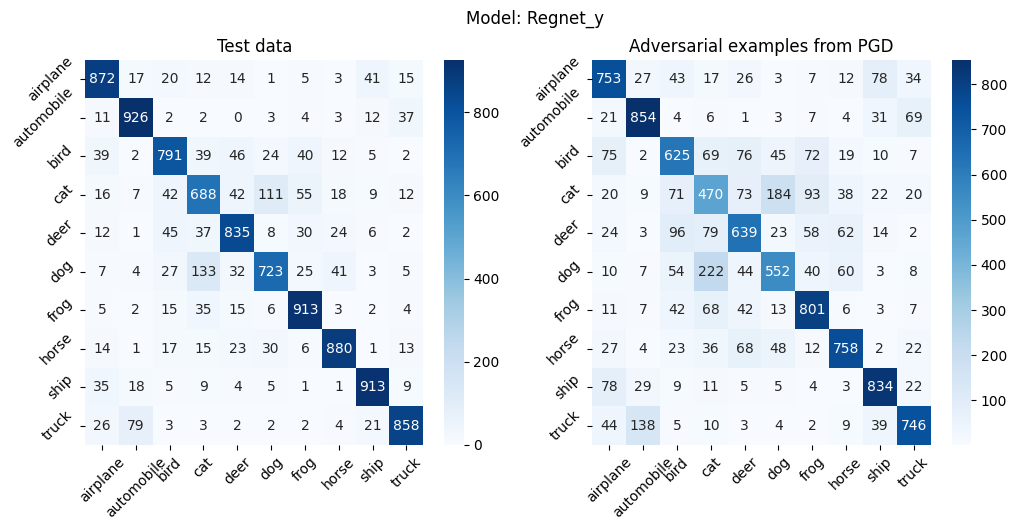

In [4]:
for model, attack in it.product(models, attacks):
    adver = catalog.load(f'{model}_model_Adversarial_{attack}@Dataset')
    cm = confusion_matrix(adver['real_labels'].tolist(), adver['model_labels'].tolist())
    cm_adver = confusion_matrix(adver['real_labels'].tolist(), adver['adversarial_labels'].tolist())
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
    ax[0].set_xticks(np.arange(len(classes))+0.5, classes, rotation = 45)
    ax[0].set_yticks(np.arange(len(classes))+0.5, classes, rotation = 45)
    ax[0].set_title('Test data')
    sns.heatmap(cm_adver, annot=True, fmt="d", cmap="Blues", ax=ax[1])
    ax[1].set_xticks(np.arange(len(classes))+0.5, classes, rotation = 45)
    ax[1].set_yticks(np.arange(len(classes))+0.5, classes, rotation = 45)
    ax[1].set_title(f'Adversarial examples from {attack}')
    plt.suptitle(f'Model: {model}')
    plt.show()

## Visualizando los ejemplos:

Write a number 12


[09/21/23 02:19:16] INFO     Loading data from 'Resnet_model_Adversarial_DeepFool@Dataset'      ]8;id=309476;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=309243;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

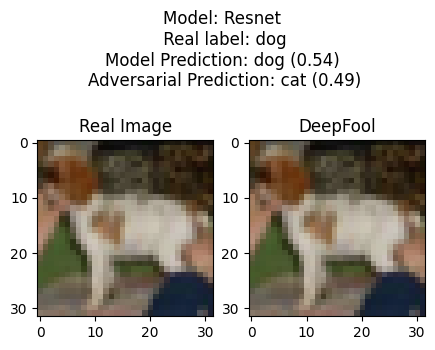

                    INFO     Loading data from 'Resnet_model_Adversarial_CarliniL2@Dataset'     ]8;id=221893;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=799441;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

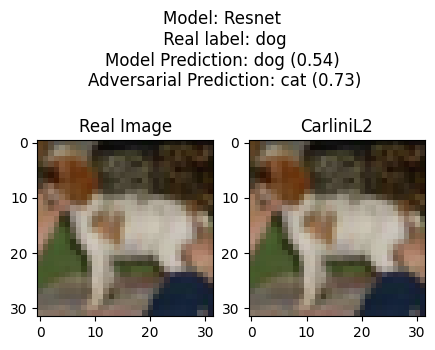

                    INFO     Loading data from 'Resnet_model_Adversarial_FSGM@Dataset'          ]8;id=542719;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=946300;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

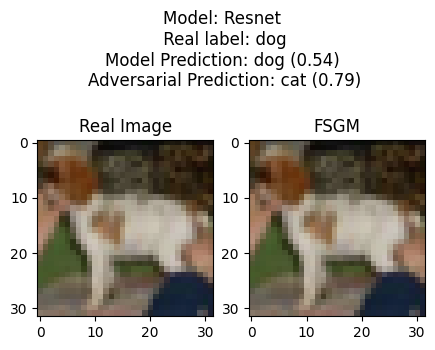

                    INFO     Loading data from 'Resnet_model_Adversarial_PGD@Dataset'           ]8;id=667443;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=914988;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

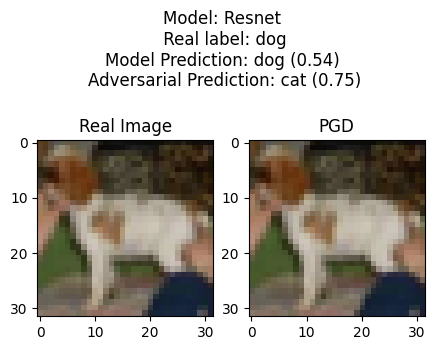

                    INFO     Loading data from 'Regnet_x_model_Adversarial_DeepFool@Dataset'    ]8;id=593391;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=273312;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

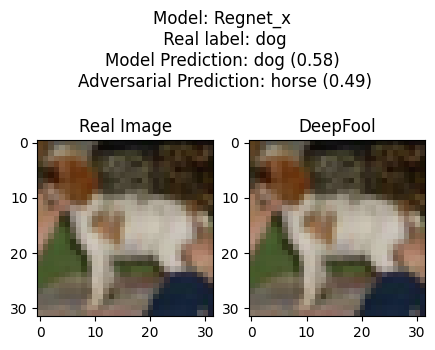

[09/21/23 02:19:17] INFO     Loading data from 'Regnet_x_model_Adversarial_CarliniL2@Dataset'   ]8;id=804947;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=999229;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

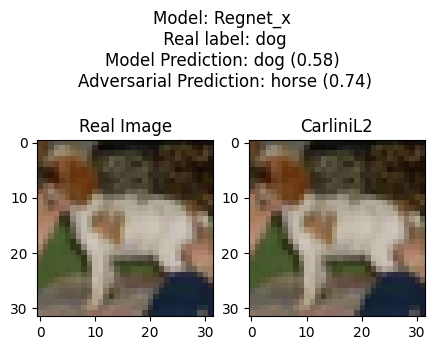

                    INFO     Loading data from 'Regnet_x_model_Adversarial_FSGM@Dataset'        ]8;id=346947;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=177059;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

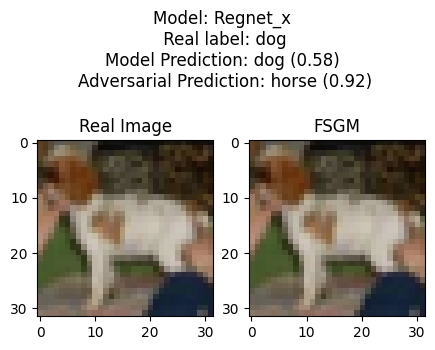

                    INFO     Loading data from 'Regnet_x_model_Adversarial_PGD@Dataset'         ]8;id=595795;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=152745;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

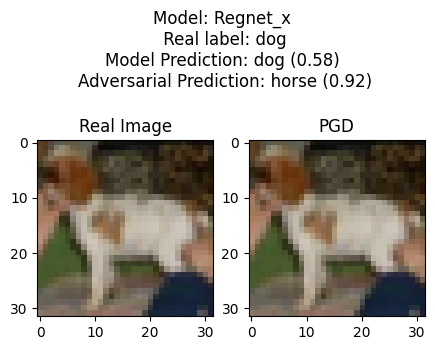

                    INFO     Loading data from 'Regnet_y_model_Adversarial_DeepFool@Dataset'    ]8;id=652693;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=801657;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

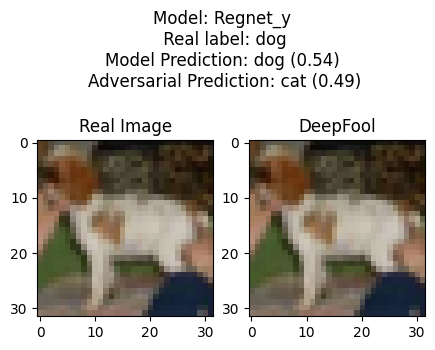

                    INFO     Loading data from 'Regnet_y_model_Adversarial_CarliniL2@Dataset'   ]8;id=610760;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=758930;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

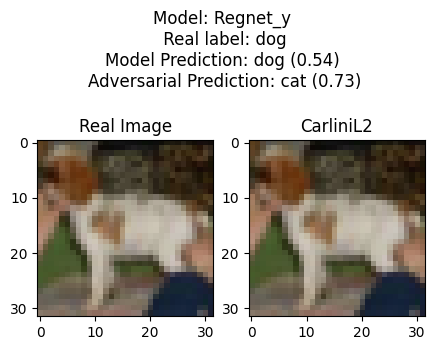

                    INFO     Loading data from 'Regnet_y_model_Adversarial_FSGM@Dataset'        ]8;id=775020;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=205102;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

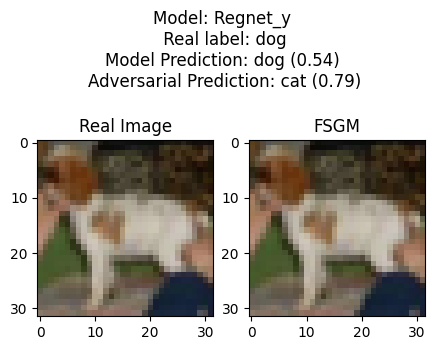

                    INFO     Loading data from 'Regnet_y_model_Adversarial_PGD@Dataset'         ]8;id=797495;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=737055;file:///opt/homebrew/Caskroom/miniconda/base/envs/adverfull/lib/python3.11/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (PytorchDatasetDict)...                                                               

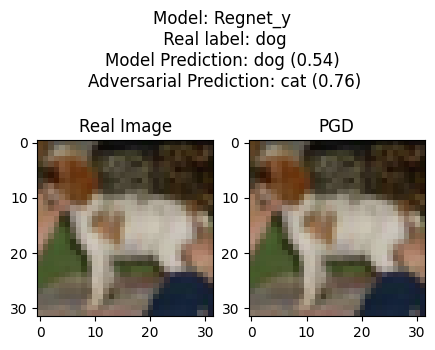

In [5]:
number = int(input('Write a number'))
for model, attack in it.product(models, attacks):
    adver = catalog.load(f'{model}_model_Adversarial_{attack}@Dataset')
    title = str(f"Model: {model} \n Real label: {testset.classes[adver['real_labels'][number]]} \n" + 
                f"Model Prediction: {testset.classes[adver['model_labels'][number]]} ({adver['confidence'][number]:.2f}) \n" +
                f"Adversarial Prediction: {testset.classes[adver['adversarial_labels'][number]]} ({adver['adversarial_confidence'][number]:.2f})")
    fig, ax = plt.subplots(1, 2, figsize = (5,4.5))
    ax[0].imshow(testset[number][0])
    ax[0].set_title("Real Image")
    ax[1].imshow(adver['examples'][number].numpy().transpose((1, 2, 0)))
    ax[1].set_title(f"{attack}")
    plt.suptitle(title)
    plt.show()